In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80
Wed Sep 29 10:49:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    32W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                           

In [ ]:
#!pip install optuna==2.3.0
#!pip install transformers==4.2.1
!pip install optuna
!pip install transformers
!pip install farasapy
!pip install pyarabic
!git clone https://github.com/aub-mind/arabert

  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 126 kB 5.2 MB/s 
Cloning into 'arabert'...
remote: Enumerating objects: 544, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (237/237), done.
remote: Total 544 (delta 175), reused 237 (delta 87), pack-reused 214
Receiving objects: 100% (544/544), 9.15 MiB | 22.97 MiB/s, done.
Resolving deltas: 100% (298/298), done.


In [ ]:
!mkdir data
!mkdir train

In [ ]:
!cp -r "/content/drive/MyDrive/Capstone Project" .

In [ ]:
import pandas as pd
import numpy as np

from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
all_datasets= []

In [ ]:
class CustomDataset:
    def __init__(
        self,
        name,
        train,
        test,
        label_list,
    ):
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Capstone Project/test.csv", sep="\t", header=0)
df_train = pd.read_csv("/content/drive/MyDrive/Capstone Project/train.csv", sep="\t", header=0)

In [ ]:
df_test['initial'][4]

'في الرابع والعشرين من ديسمبر / كانون الأول2014، حُكم على المدوّن الموريتاني محمد شيخ ولد محمد\xa0بالموت رميًا بالرصاص، على خلفية مقال نشره قبل أكثر من سنة. كان ذلك أول حكم بالإعدام في قضية ردّة في موريتانيا منذ استقلالها عام 1960.في المقال المعنون “الدين والتدين ولمعلمين“، انتقد شيخ نظام الطوائف الطبقي في بلاده، مشبّهًا إياه بما رآه ممارسات مماثلة في عهد الرسول محمد. على إثر ذلك، اتهم شيخ بإهانة الرسول.“[قضية شيخ] هي مجرد محاولة لكتم صوت كل من يحاول التشكيك في نظام قائم على القمع باستخدام الدين”، يقول سيدو واني، الناشط الموريتاني ضد العنصرية والعبودية، في\xa0تغريدة\xa0له على تويتر.محمد شيخ، ذو الثمانية وعشرين عامًا، ضحية جديدة لحكومة قمعية في بلد ذي غالبية مسلمة، كثيرًا ما يستخدم “الردة” و”الكفر” كذرائع لملاحقة من يدعون للإصلاح ويرفعون صوتهم ضد مشاكل سياسية. بحكمها على محمد شيخ بالإعدام، تدعي السلطات الموريتانية أنها تحمي الإسلام والرسول، لكن العقوبة في الغالب لن تحمي سوى النظام الحاكم أمام المزيد من الانتقادات السياسية.معلقًا\xa0على قضية شيخ، كتب الصحفي برايان ويتيكر، صاحب كتاب “عرب 

In [ ]:
#df_train = df_train.drop(['Text_stem', 'Text_seg'], axis='columns')
#df_test = df_test.drop(['Text_stem', 'Text_seg'], axis='columns')
df_train = df_train.drop(['Text_stem', 'Text_seg','Belarus In Turmoil',
       'How the Karabakh conflict is transforming regional politics',
       'Myanmar Coup', 'Myanmar Election 2020', 'NewsFrames',
       'أخبار جيدة', 'أخبار عاجلة', 'أديان',
       'الأصوات الصاعدة', 'الأعراق والأجناس', 'الألعاب الأولمبية',
       'الاقتصاد والأعمال', 'الجسر', 'الدعم الإنساني',
       'الهجرة والنزوح', 'انتخابات',
       'بود كاست الأصوات العالمية', 'بيئة', 'تاريخ', 'تصوير', 'تطوير', 'تعليم',
       'حجب',
       'حقوق المختلفين جنسيًا', 'حوارات نحو عالم أفضل',
       'دفاع الأصوات العالمية', 'رياضة', 'سياحة وسفر', 'شباب',
       'شبكة التكنولوجيا من أجل الشفافية', 'صحة', 'طعام',
       'علاقات دولية', 'علم', 'عمل', 'فكاهة', 'قانون',
       'قمة الأصوات العالمية 2012', 'قمة الأصوات العالمية 2015', 'كوارث',
       'لاجئون', 'لغات', 'مدونة مجتمع الأصوات العالمية',
       'مستقبل تكنولوجيا المعلومات والإتصالات في التنمية', 'مشروع RuNet Echo',
       'مشروع السبع بلايين نسمة', 'مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة',
       'موسيقى', 'وجوه الأصوات العالمية'], axis='columns')

df_test = df_test.drop(['Text_stem', 'Text_seg','Belarus In Turmoil',
       'How the Karabakh conflict is transforming regional politics',
       'Myanmar Coup', 'Myanmar Election 2020', 'NewsFrames',
       'أخبار جيدة', 'أخبار عاجلة', 'أديان',
       'الأصوات الصاعدة', 'الأعراق والأجناس', 'الألعاب الأولمبية',
       'الاقتصاد والأعمال', 'الجسر', 'الدعم الإنساني',
       'الهجرة والنزوح', 'انتخابات',
       'بود كاست الأصوات العالمية', 'بيئة', 'تاريخ', 'تصوير', 'تطوير', 'تعليم',
       'حجب',
       'حقوق المختلفين جنسيًا', 'حوارات نحو عالم أفضل',
       'دفاع الأصوات العالمية', 'رياضة', 'سياحة وسفر', 'شباب',
       'شبكة التكنولوجيا من أجل الشفافية', 'صحة', 'طعام',
       'علاقات دولية', 'علم', 'عمل', 'فكاهة', 'قانون',
       'قمة الأصوات العالمية 2012', 'قمة الأصوات العالمية 2015', 'كوارث',
       'لاجئون', 'لغات', 'مدونة مجتمع الأصوات العالمية',
       'مستقبل تكنولوجيا المعلومات والإتصالات في التنمية', 'مشروع RuNet Echo',
       'مشروع السبع بلايين نسمة', 'مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة',
       'موسيقى', 'وجوه الأصوات العالمية'], axis='columns')

In [ ]:
df_train.columns , df_test.columns

(Index(['initial', 'COVID-19', 'آداب', 'أصالة', 'أفكار', 'أفلام', 'احتجاج',
        'الإعلام والصحافة', 'النساء والنوع', 'النشاط الرقمي', 'تقنية',
        'حروب ونزاعات', 'حرية التعبير', 'حقوق الإنسان', 'حكم', 'سياسة',
        'صحافة المواطن', 'فنون وثقافة'],
       dtype='object'),
 Index(['initial', 'COVID-19', 'آداب', 'أصالة', 'أفكار', 'أفلام', 'احتجاج',
        'الإعلام والصحافة', 'النساء والنوع', 'النشاط الرقمي', 'تقنية',
        'حروب ونزاعات', 'حرية التعبير', 'حقوق الإنسان', 'حكم', 'سياسة',
        'صحافة المواطن', 'فنون وثقافة'],
       dtype='object'))

In [ ]:
label_list_Testing = df_train.columns.to_list()[1:]
label_list_Testing

['COVID-19',
 'آداب',
 'أصالة',
 'أفكار',
 'أفلام',
 'احتجاج',
 'الإعلام والصحافة',
 'النساء والنوع',
 'النشاط الرقمي',
 'تقنية',
 'حروب ونزاعات',
 'حرية التعبير',
 'حقوق الإنسان',
 'حكم',
 'سياسة',
 'صحافة المواطن',
 'فنون وثقافة']

In [ ]:
train_label_list = [row[1:] for row in df_train.to_numpy().tolist()]
test_label_list = [row[1:] for row in df_test.to_numpy().tolist()]

In [ ]:
len(test_label_list[0])

17

In [ ]:
df_train = pd.DataFrame.from_dict({"text": list(df_train['initial']),"label":train_label_list})
df_test = pd.DataFrame.from_dict({"text": list(df_test['initial']),"label":test_label_list})

In [ ]:
df_train

,text,label
0,عمل الفنان هو عبارة عن مزيج من النجاحات التي ت...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,كتب المدوّن المصري شيء بقلبي عن حملة بعنوان 3...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,يقضي “كريم إنارة”، رئيس وحدة العدالة الجنائية ...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, ..."
3,هذا المقال جزء من تغطيتنا الخاصة بالثورة المص...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,تذكر التقارير الصحفية أن دق ناقوس الخطر بسبب ا...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...
3970,غردت فرح جون عن الفنانة الإيرانية عذرا عقیقی ب...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3971,المدون داريوس كاديفا من مدونة Iranian.com يكتب...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
3972,مهنة تعليم الآخرين هي مهنة جديرة بالتقدير خاصة...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3973,صرّح متظاهرو “الثورة الملونة” في مقدونيا أن إع...,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, ..."


In [ ]:
data_Testing = CustomDataset("Testing", df_train, df_test, label_list_Testing)

In [ ]:
from arabert.preprocess import ArabertPreprocessor
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score , recall_score

from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, BertTokenizer
from transformers.data.processors import SingleSentenceClassificationProcessor
from transformers import Trainer , TrainingArguments
from transformers.trainer_utils import EvaluationStrategy
from transformers.data.processors.utils import InputFeatures
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.utils import resample
import logging
import torch
import optuna 

In [ ]:
logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(__name__)

In [ ]:
dataset_name = 'Testing'
model_name = 'aubmindlab/bert-base-arabertv02'
task_name = 'classification'
max_len = 256

In [ ]:
selected_dataset = data_Testing # this is useless i know

In [ ]:
arabert_prep = ArabertPreprocessor(model_name.split("/")[-1])

selected_dataset.train['text'] = selected_dataset.train['text'].apply(lambda x:   arabert_prep.preprocess(x))
selected_dataset.test['text'] = selected_dataset.test['text'].apply(lambda x:   arabert_prep.preprocess(x))  

In [ ]:
selected_dataset.train['text']

0       عمل الفنان هو عبارة عن مزيج من النجاحات التي ت...
1       كتب المدون المصري شيء بقلبي عن حملة بعنوان 30 ...
2       يقضي “ كريم إنارة ” ، رئيس وحدة العدالة الجنائ...
3       هذا المقال جزء من تغطيتنا الخاصة بالثورة المصر...
4       تذكر التقارير الصحفية أن دق ناقوس الخطر بسبب ا...
                              ...                        
3970    غردت فرح جون عن الفنانة الإيرانية عذرا عق ق بخ...
3971    المدون داريوس كاديفا من مدونة [رابط] يكتب [انك...
3972    مهنة تعليم الآخرين هي مهنة جديرة بالتقدير خاصة...
3973    صرح متظاهرو “ الثورة الملونة ” في مقدونيا أن إ...
3974    يعرض فن الحائط في البحرين في Wooster Collectiv...
Name: text, Length: 3975, dtype: object

In [ ]:
tok = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/381 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/384 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/825k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
import matplotlib.pyplot as plt

Token indices sequence length is longer than the specified maximum sequence length for this model (776 > 512). Running this sequence through the model will result in indexing errors


Training Sentence Lengths: 


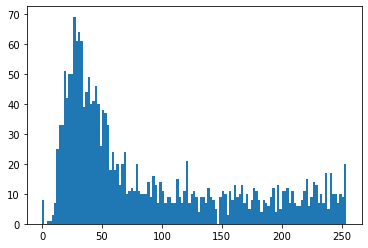

1940
Testing Sentence Lengths: 


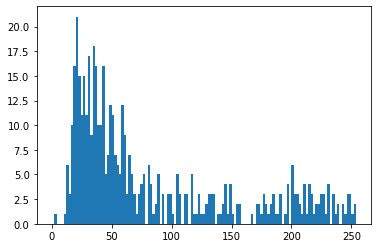

511


In [ ]:
print("Training Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in selected_dataset.train['text'].to_list()],bins=range(0,256,2))
plt.show()
print(sum([len(tok.tokenize(sentence)) > 256 for sentence in selected_dataset.train['text'].to_list()]))

print("Testing Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in selected_dataset.test['text'].to_list()],bins=range(0,256,2))
plt.show()
print(sum([len(tok.tokenize(sentence)) > 256 for sentence in selected_dataset.test['text'].to_list()]))

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
      super(BERTDataset).__init__()
      self.text = text
      self.target = target
      self.tokenizer_name = model_name
      self.tokenizer = AutoTokenizer.from_pretrained(model_name)
      self.max_len = max_len
      self.label_map = label_map
      

    def __len__(self):
      return len(self.text)

    def __getitem__(self,item):
      text = str(self.text[item])
      text = " ".join(text.split())


        
      input_ids = self.tokenizer.encode(
          text,
          add_special_tokens=True,
          max_length=self.max_len,
          truncation='longest_first'
      )     
    
      attention_mask = [1] * len(input_ids)

      # Zero-pad up to the sequence length.
      padding_length = self.max_len - len(input_ids)
      input_ids = input_ids + ([self.tokenizer.pad_token_id] * padding_length)
      attention_mask = attention_mask + ([0] * padding_length)  
      lb = self.target[item]
      return InputFeatures(input_ids=input_ids, attention_mask=attention_mask, label=lb)

In [ ]:
len(label_list_Testing)

17

In [ ]:
label_map = { v:index for index, v in enumerate(label_list_Testing) }
inv_label_map = { v:k for k,v in label_map.items()}
# label_map = label_list_Testing

train_dataset = BERTDataset(
  selected_dataset.train['text'].to_list(),
  selected_dataset.train['label'].to_list(),
  model_name,
  max_len,
  label_map
  )
test_dataset = BERTDataset(
  selected_dataset.test['text'].to_list(),
  selected_dataset.test['label'].to_list(),
  model_name,
  max_len,
  label_map
  )

In [ ]:
it = iter(train_dataset)

In [ ]:
next(it).label

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [ ]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(
        model_name,
         return_dict=True,
          num_labels=len(label_map),
          problem_type='multi_label_classification',
          id2label=inv_label_map,
          label2id=label_map
      )

In [ ]:
import scipy

def compute_metrics(p): #p should be of type EvalPrediction
  preds = scipy.special.softmax(p.predictions) > 0.5
  assert len(preds) == len(p.label_ids)
  print(classification_report(p.label_ids,preds))
  #print(confusion_matrix(p.label_ids,preds))

  macro_f1 = f1_score(p.label_ids,preds,average='macro')
  macro_precision = precision_score(p.label_ids,preds,average='macro')
  macro_recall = recall_score(p.label_ids,preds,average='macro')
  acc = accuracy_score(p.label_ids,preds)
  return {
      'macro_f1' : macro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'accuracy': acc
  }

In [ ]:
training_args = TrainingArguments( 
    output_dir= "./train",    
    adam_epsilon = 1e-8,
    learning_rate = 2e-5,
    fp16 = False,
    #per_device_train_batch_size = 8,
    #per_device_eval_batch_size = 8,
    per_device_train_batch_size = 10,
    per_device_eval_batch_size = 10,
    gradient_accumulation_steps = 4,
    #num_train_epochs= 10,
    num_train_epochs= 3,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    load_best_model_at_end = False,
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed = 666
  )

In [ ]:
steps_per_epoch = (len(selected_dataset.train)// (training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps))
total_steps = steps_per_epoch * training_args.num_train_epochs
print(steps_per_epoch)
print(total_steps)

99
297


In [ ]:
trainer = Trainer(
    args=training_args,
    train_dataset=train_dataset, 
    eval_dataset=test_dataset, 
    model_init=model_init,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

loading configuration file https://huggingface.co/aubmindlab/bert-base-arabertv02/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/411eec8d9e12bf4c11eebebb4c5fecd46da787616f45bcfd6cb187e0917afae0.2f0d0092105af7b8b42b899ffb7f801dc48e93516d509483f6cfbd86155d49ea
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "COVID-19",
    "1": "\u0622\u062f\u0627\u0628",
    "2": "\u0623\u0635\u0627\u0644\u0629",
    "3": "\u0623\u0641\u0643\u0627\u0631",
    "4": "\u0623\u0641\u0644\u0627\u0645",
    "5": "\u0627\u062d\u062a\u062c\u0627\u062c",
    "6": "\u0627\u0644\u0625\u0639\u0644\u0627\u0645 \u0648\u0627\u0644\u0635\u062d\u0627\u0641\u0629",
    "7": "\u0627\u0644\u0646\u0633\u0627\u0621 \u0648\u0627\u0644\u0646\u0648\u0639",
    "8": "\u062

Epoch,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
0,No log,0.339935,0.000000,0.000000,0.000000,0.048290
1,No log,0.313755,0.000000,0.000000,0.000000,0.048290
2,No log,0.303295,0.000000,0.000000,0.000000,0.048290


***** Running Evaluation *****
  Num examples = 994
  Batch size = 10


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00       169
           6       0.00      0.00      0.00       111
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       207
           9       0.00      0.00      0.00       119
          10       0.00      0.00      0.00       165
          11       0.00      0.00      0.00       175
          12       0.00      0.00      0.00       268
          13       0.00      0.00      0.00       134
          14       0.00      0.00      0.00       282
          15       0.00      0.00      0.00       740
          16       0.00      0.00      0.00       146

   micro avg       0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00       169
           6       0.00      0.00      0.00       111
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       207
           9       0.00      0.00      0.00       119
          10       0.00      0.00      0.00       165
          11       0.00      0.00      0.00       175
          12       0.00      0.00      0.00       268
          13       0.00      0.00      0.00       134
          14       0.00      0.00      0.00       282
          15       0.00      0.00      0.00       740
          16       0.00      0.00      0.00       146

   micro avg       0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00       169
           6       0.00      0.00      0.00       111
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       207
           9       0.00      0.00      0.00       119
          10       0.00      0.00      0.00       165
          11       0.00      0.00      0.00       175
          12       0.00      0.00      0.00       268
          13       0.00      0.00      0.00       134
          14       0.00      0.00      0.00       282
          15       0.00      0.00      0.00       740
          16       0.00      0.00      0.00       146

   micro avg       0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control 

TrainOutput(global_step=297, training_loss=0.3459415371570523, metrics={'train_runtime': 1123.1029, 'train_samples_per_second': 10.618, 'train_steps_per_second': 0.264, 'total_flos': 1567037353190400.0, 'train_loss': 0.3459415371570523, 'epoch': 2.99})

In [ ]:
trainer.model.config.id2label = inv_label_map
trainer.model.config.label2id = label_map

In [ ]:
trainer.save_model("SOME_PATH")
train_dataset.tokenizer.save_pretrained("SOME_PATH")